___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
df = pd.read_csv("KNN_Project_Data",index_col=0)

In [3]:
df.head()

GWYH         TRAT        TLLZ         IGGA         HYKR  \
XVPM                                                                          
1636.670614   817.988525  2565.995189  358.347163   550.417491  1618.870897   
1013.402760   577.587332  2644.141273  280.428203  1161.873391  2084.107872   
1300.035501   820.518697  2025.854469  525.562292   922.206261  2552.355407   
1059.347542  1066.866418   612.000041  480.827789   419.467495   685.666983   
1018.340526  1313.679056   950.622661  724.742174   843.065903  1370.554164   

                    EDFS        GUUB         MGJM         JHZC  TARGET CLASS  
XVPM                                                                          
1636.670614  2147.641254  330.727893  1494.878631   845.136088             0  
1013.402760   853.404981  447.157619  1193.032521   861.081809             1  
1300.035501   818.676686  845.491492  1968.367513  1647.186291             1  
1059.347542   852.867810  341.664784  1154.391368  1450.935357             0  
1018.340526   905.469453  658.118202   539.459350  1899.850792             0

**Check the head of the dataframe.**

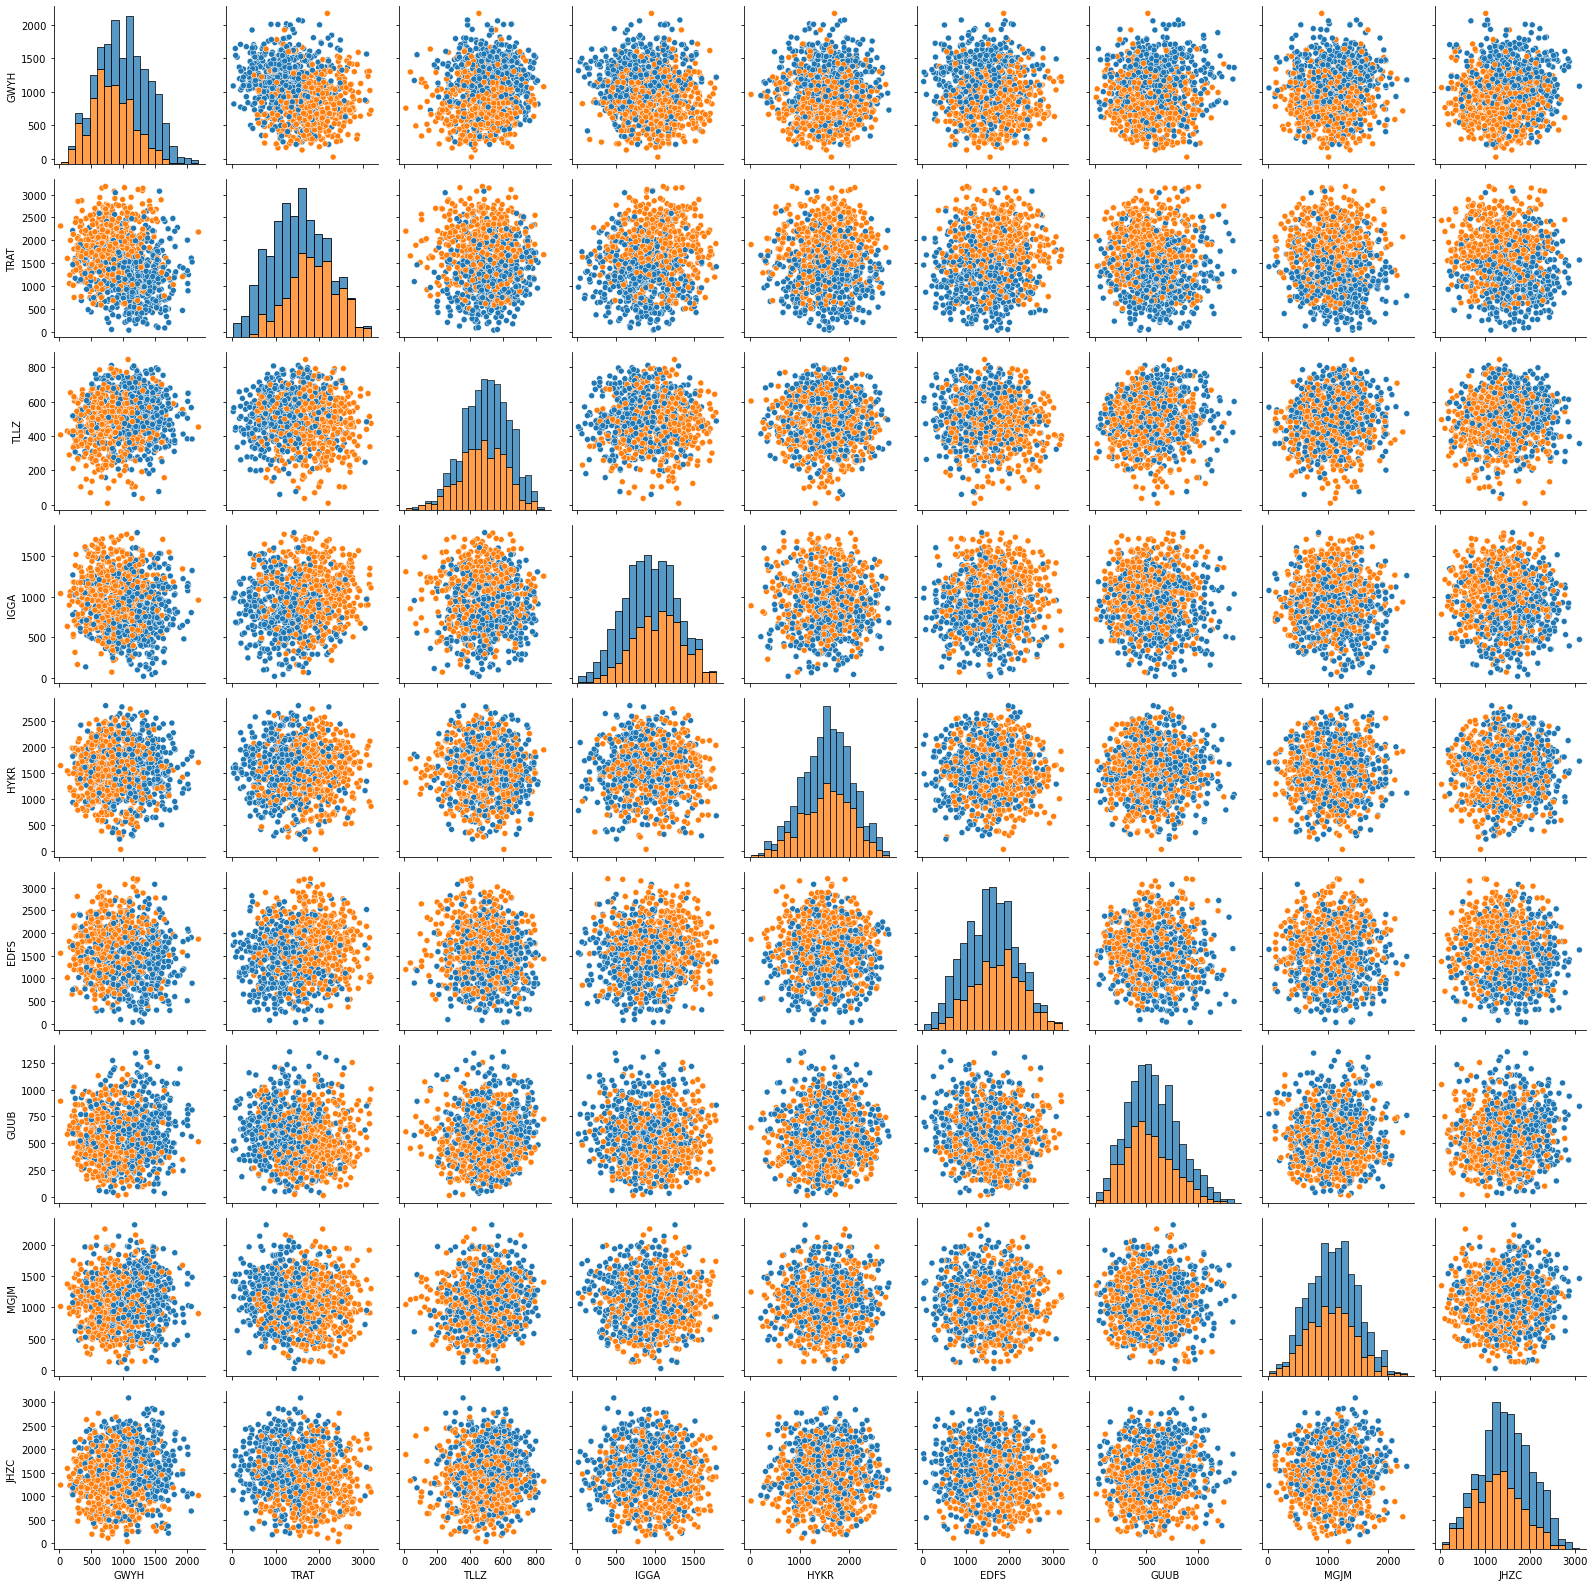

In [4]:
pg=sns.PairGrid(df, hue='TARGET CLASS')
pg.map_diag(sns.histplot,  multiple="stack")
pg.map_offdiag(sns.scatterplot)

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [5]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [6]:
scaler= StandardScaler()

** Fit scaler to the features.**

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [9]:
#Extracting the names of columns from df
column_names=df.columns[:-1]

In [10]:
#Stroing the scaled/transformed data frame into a data frame named as scaled_df
scaled_df=pd.DataFrame(scaled_features, columns=column_names)

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [11]:
scaled_df.head()

GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS      GUUB  \
0 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493 -0.932794   
1 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663 -0.461864   
2 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707  1.149298   
3  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561 -0.888557   
4  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644  0.391419   

       MGJM      JHZC  
0  1.008313 -1.069627  
1  0.258321 -1.041546  
2  2.184784  0.342811  
3  0.162310 -0.002793  
4 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#Splitting the dataframe into two parts. 
X_train, X_test, y_train, y_test=train_test_split(scaled_df, df['TARGET CLASS'], test_size=0.30)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [14]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [15]:
kNN = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [16]:
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [19]:
predcited= kNN.predict(X_test)

** Create a confusion matrix and classification report.**

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, predcited))

[[104  29]
 [ 48 119]]


In [23]:
print(classification_report(y_test,predcited))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       133
           1       0.80      0.71      0.76       167

    accuracy                           0.74       300
   macro avg       0.74      0.75      0.74       300
weighted avg       0.75      0.74      0.74       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [33]:
#Sum of sqaured errors (sse)
sse=[]
for k in range(1,40):   
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train,y_train)
    pred_i = kNN.predict(X_test)
    sse.append(np.mean(pred_i != y_test))
    

In [34]:
sse

[0.25666666666666665,
 0.27,
 0.22333333333333333,
 0.22666666666666666,
 0.21333333333333335,
 0.20666666666666667,
 0.20333333333333334,
 0.21666666666666667,
 0.2,
 0.2,
 0.19666666666666666,
 0.18666666666666668,
 0.18333333333333332,
 0.17333333333333334,
 0.18,
 0.18333333333333332,
 0.17666666666666667,
 0.19,
 0.17333333333333334,
 0.18333333333333332,
 0.18,
 0.19333333333333333,
 0.18,
 0.18,
 0.18,
 0.19333333333333333,
 0.16666666666666666,
 0.17666666666666667,
 0.16333333333333333,
 0.17,
 0.17,
 0.18,
 0.17333333333333334,
 0.18,
 0.17666666666666667,
 0.17,
 0.17333333333333334,
 0.18,
 0.17]

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

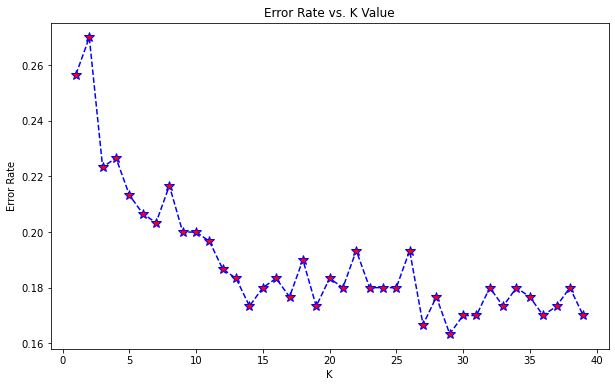

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),sse,color='blue', linestyle='dashed', marker='*',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [39]:
#Splitting the dataframe into two parts. 
X_train, X_test, y_train, y_test=train_test_split(scaled_df, df['TARGET CLASS'], test_size=0.30)
#Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Creating a model object
kNN = KNeighborsClassifier(n_neighbors=14)

#Training the model
kNN.fit(X_train, y_train)
#predicting the new Y_test on the base of X_tets data
predcited= kNN.predict(X_test)
#evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predcited))
print(classification_report(y_test,predcited))

[[114  32]
 [ 21 133]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       146
           1       0.81      0.86      0.83       154

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [ ]:
#Much better  precision and accuracy using the K_neighbors =14

# Great Job!